# Lesson 5. Data Mapping

Data driven mapping refers to the process of using data values to determine the symbology of mapped features. Color, shape, and size and the three most common symbology types used in data driven mapping.
Data driven maps are often refered to as thematic maps.

### Types of Thematic Maps

There are two primary types of maps used to convey data values:

- `Choropleth maps`: set the color of areas (polygons) by data value
- `Point symbol maps`: set the color or size of points by data value

We will discuss both of these types of maps in more detail in the next lesson. But let's take a quick look at choropleth maps. 

In [1]:
import pandas as pd
import geopandas as gpd

import matplotlib # base python plotting library
import matplotlib.pyplot as plt # submodule of matplotlib

# To display plots, maps, charts etc in the notebook
%matplotlib inline  

## 5.1 DATA REFERESHER INTRO

## 5.2 Choropleth Maps
Choropleth maps are the most common type of thematic map.

Let's take a look at how we can use a geodataframe to make a choropleth map.

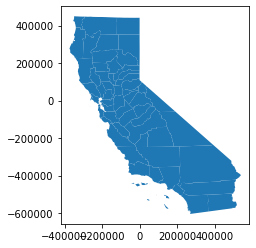

In [2]:
counties = gpd.read_file('notebook_data/california_counties/CaliforniaCounties.shp')
counties.plot()

In [3]:
counties.head()

,FID_,NAME,STATE_NAME,POP2010,POP10_SQMI,POP2012,POP12_SQMI,WHITE,BLACK,AMERI_ES,...,AVG_SALE07,SQMI,CountyFIPS,NEIGHBORS,PopNeigh,NEIGHBOR_1,PopNeigh_1,NEIGHBOR_2,PopNeigh_2,geometry
0,0,Kern,California,839631,102.9,851089,104.282870,499766,48921,12676,...,1513.53,8161.35,06103,"San Bernardino,Tulare,Inyo",2495935,None,None,None,None,"POLYGON ((193446.035 -244342.585, 194033.795 -..."
1,0,Kings,California,152982,109.9,155039,111.427421,83027,11014,2562,...,1203.20,1391.39,06089,"Fresno,Kern,Tulare",2212260,None,None,None,None,"POLYGON ((12524.028 -179431.328, 12358.142 -17..."
2,0,Lake,California,64665,48.6,65253,49.082334,52033,1232,2049,...,72.31,1329.46,06106,None,0,None,None,None,None,"MULTIPOLYGON (((-240632.150 93056.104, -240669..."
3,0,Lassen,California,34895,7.4,35039,7.422856,25532,2834,1234,...,120.92,4720.42,06086,None,0,None,None,None,None,"POLYGON ((-45364.032 352060.633, -45248.844 35..."
4,0,Los Angeles,California,9818605,2402.3,9904341,2423.264150,4936599,856874,72828,...,187.94,4087.19,06073,"San Bernardino,Kern",2874841,None,None,None,None,"MULTIPOLYGON (((173874.519 -471855.293, 173852..."


In [4]:
counties.columns

Index(['FID_', 'NAME', 'STATE_NAME', 'POP2010', 'POP10_SQMI', 'POP2012',
       'POP12_SQMI', 'WHITE', 'BLACK', 'AMERI_ES', 'ASIAN', 'HAWN_PI',
       'HISPANIC', 'OTHER', 'MULT_RACE', 'MALES', 'FEMALES', 'AGE_UNDER5',
       'AGE_5_9', 'AGE_10_14', 'AGE_15_19', 'AGE_20_24', 'AGE_25_34',
       'AGE_35_44', 'AGE_45_54', 'AGE_55_64', 'AGE_65_74', 'AGE_75_84',
       'AGE_85_UP', 'MED_AGE', 'MED_AGE_M', 'MED_AGE_F', 'HOUSEHOLDS',
       'AVE_HH_SZ', 'HSEHLD_1_M', 'HSEHLD_1_F', 'MARHH_CHD', 'MARHH_NO_C',
       'MHH_CHILD', 'FHH_CHILD', 'FAMILIES', 'AVE_FAM_SZ', 'HSE_UNITS',
       'VACANT', 'OWNER_OCC', 'RENTER_OCC', 'NO_FARMS07', 'AVG_SIZE07',
       'CROP_ACR07', 'AVG_SALE07', 'SQMI', 'CountyFIPS', 'NEIGHBORS',
       'PopNeigh', 'NEIGHBOR_1', 'PopNeigh_1', 'NEIGHBOR_2', 'PopNeigh_2',
       'geometry'],
      dtype='object')

Now, let's create a choropleth map by setting the color of the county based on the values in the population per square mile (`POP12_SQMI`) column.

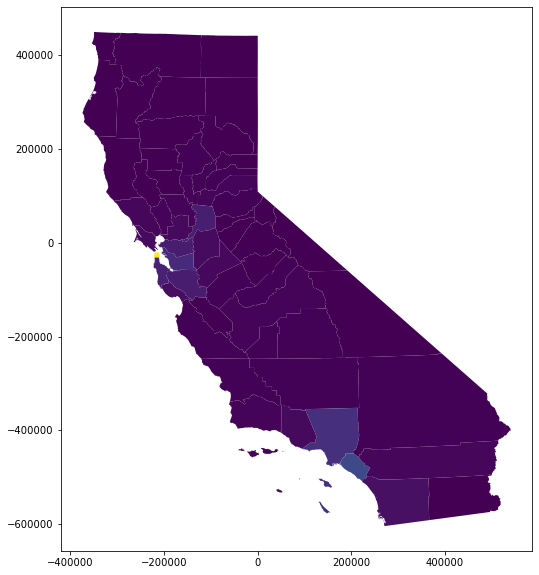

In [5]:
counties.plot(column='POP12_SQMI', figsize=(10,10))

That's really the heart of it. To set the color of the features based on the values in a column, set the `column` argument to the column name in the gdf.
> **Pro-tips:** 
- You can quickly right-click on the plot and save to a file or open in a new browser window.

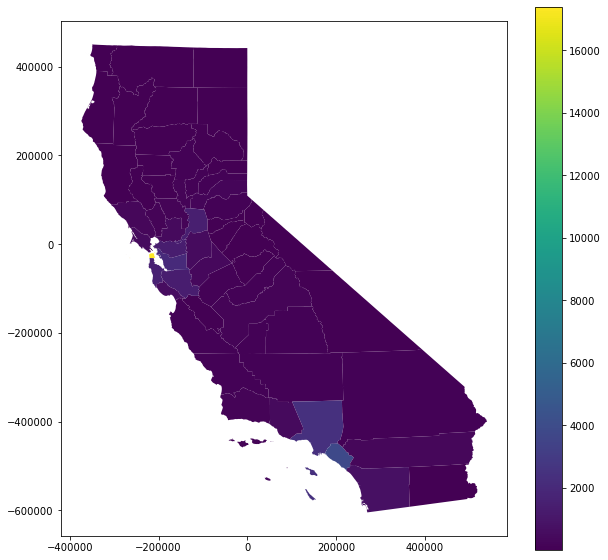

In [6]:
counties.plot(column='POP12_SQMI', figsize=(10,10), legend=True)
plt.show()

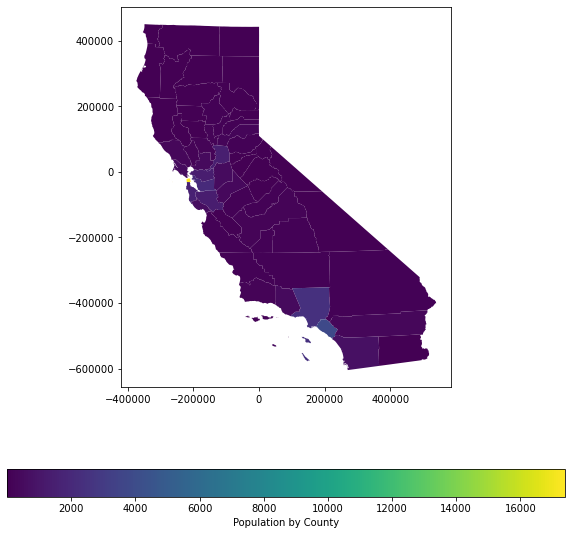

In [7]:
counties.plot(column='POP12_SQMI', figsize=(10,10), legend=True,
                    legend_kwds={'label': "Population by County",
                                 'orientation': "horizontal"},)
plt.show()

<div style="display:inline-block;vertical-align:top;">
    <img src="http://www.pngall.com/wp-content/uploads/2016/03/Light-Bulb-Free-PNG-Image.png" width="30" align=left > 
</div>  
<div style="display:inline-block;">

#### Question
</div>

Why are we plotting `POP12_SQMI` instead of `POP2012`?

In [8]:
# Your thoughts here

### COPIED REWORD
### About Choropleth maps

There are several types of quantitative data variables that can be used to create a choropleth map. Let's consider these in terms of our ACS data.

- `Counts`: display the count of observations aggregated by a feature, for example, the population within a census tract.

- `Density`: express the count within a feature by the of area of the feature, for example, population per square mile within a census tract, 

- `Proportions / Percentages`: compare the value of a part to the whole. For example, the proportion of the tract population that is white compared to the total tract population.

- `Rates/ratios`: compare the relationship of one observation to another. For example the homeowner to renter ratio would be calculated as the number of homeowners (c_owners/ c_renters).


The goal of a choropleth map is to use color to visualize the spatial distribution of a quantitative variable.

- Brighter or richer colors are typically used to signify higher values.

A big problem with choropleth maps is that our eyes are drawn to the color of larger areas, even even if the value being mapped is more significant in one or more smaller areas.

This problem is exacerbated when the variable being mapped is a `count` rather than a standardized variable like density or percent. Large areas often have higher counts than smaller areas but not necessary higher densities, percents, or rates.

For this reason it is considered best practice to create choropleth maps of standardized variables and not raw counts!

Making this chart better...

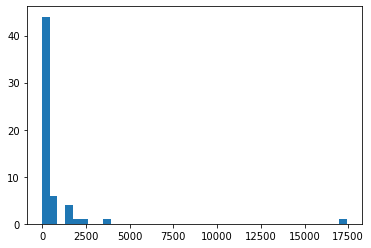

In [9]:
plt.hist(counties['POP12_SQMI'],bins=40)
plt.show()

## 2.4 Classification schemes

The common alternative to a proportionial color map is to use a **classification scheme** to create a **graduated color map**. This is the standard way to create a **choropleth map**.

A `Classification scheme` is a method for binning continuous data values into 4-7 classes (the default is 5) and map those classes to a color palette. 

There are a few commonly used classifications schemes:

- `EQUAL INTERVAL` divides the data into equal size data ranges (e.g., 0-10, 10-20, 20-30, etc.). This scheme is best for data that is spread across the entire range of values. It also is easily understandable by map readers. However, avoid it if you have highly skewed data or a few big outliers.
 
 
- `QUANTILE` classification places an equal number of observations in each bin. This scheme creates nice maps because it best spreads the colors across the full set of data values. For this reason it is the default scheme used by mapping software. The downside of quantile classes is that since the bin ranges are based on the number of observations and not the data values different classes can have very similar or very different values.
 
 
- `NATURAL BREAKS` classification schemes like `fisher-jenks` minimize within-class variance and maximize between-class differences. This is great for exploratory data analysis since it can identify natural groupings in the data. However, since the class breaks are best fit to one dataset, the same bins cannot easily be used for multiple year comparisons because each year has a differnt scale.
 
 
- `MANUAL` classifications are user-defined by the map creator. This is especially useful if you want to slightly change the breaks of another classification scheme or use a fixed set of breaks to compare data over time.


### Classification schemes and GeoDataFrames

Classification schemes can be implemented using the geodataframe `plot` method by setting a value for the **scheme** argument. This requires the [pysal](https://pysal.org/) and [mapclassify](https://pysal.org/mapclassify) libraries to be installed in your Python environment. 

Here is a list of the `classification schemes` names that we will use:
-  `equalinterval`, `quantiles`,`fisherjenks`,`naturalbreaks`, and `userdefined`.

For more information about these classification schemes see the [pysal mapclassifiers web page](https://pysal.org/mapclassify/api.html) or check out the help docs.

### Classification schemes in action

Let's redo the last map using the `quantile` classification scheme.

- What is different about the code...and the output map?

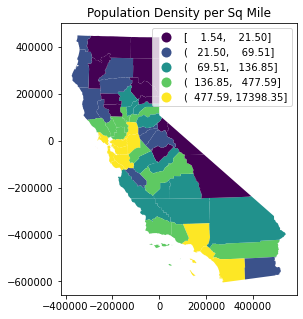

In [10]:
# Plot population density - mile^2
fig, ax = plt.subplots(figsize = (10,5)) 
counties.plot(column='POP12_SQMI', 
                   scheme="quantiles",
                   legend=True,
                   ax=ax
                   )
ax.set_title("Population Density per Sq Mile")
plt.show()

### User Defined Classification Schemes

You may get pretty close to your final map without being completely satisfied. In this case you can manually define a classification scheme.

Let's customize our map with a `user-defined` classification scheme where we manually set the breaks for the bins using the `classification_kwds` argument.

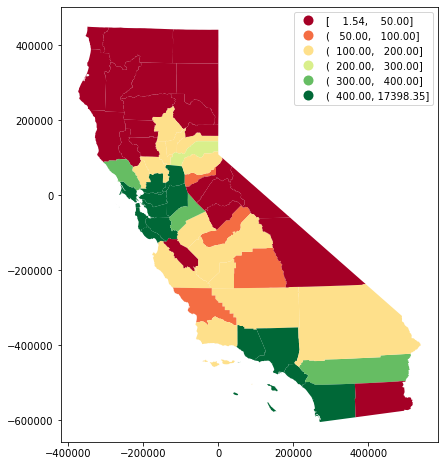

In [11]:
fig, ax = plt.subplots(figsize = (14,8)) 
counties.plot(column='POP12_SQMI',
                    legend=True, 
                    cmap="RdYlGn", 
                    scheme='user_defined', 
                    classification_kwds={'bins':[50,100,200,300,400]},
                    ax=ax)
plt.show()

Since we are customizing our plot, we can also edit our legend to specify and format the text so that it's easier to read.

- We'll use `legend_labels_list` to customize the labels for group in the legend.

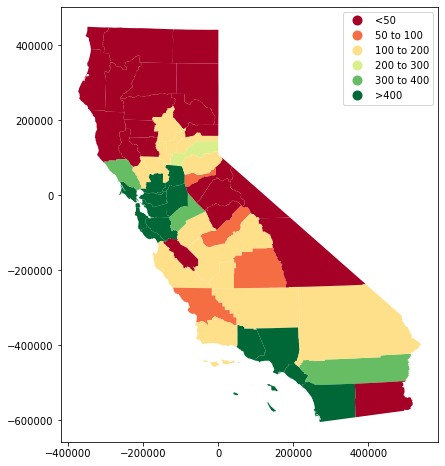

In [12]:
fig, ax = plt.subplots(figsize = (14,8)) 
counties.plot(column='POP12_SQMI',
                    legend=True, 
                    cmap="RdYlGn", 
                    scheme='user_defined', 
                    classification_kwds={'bins':[50,100,200,300,400]},
                    ax=ax)

# Create the labels for the legend
legend_labels_list = ['<50','50 to 100','100 to 200','200 to 300','300 to 400','>400']

# Apply the labels to the plot
for j in range(0,len(ax.get_legend().get_texts())):
        ax.get_legend().get_texts()[j].set_text(legend_labels_list[j])

plt.show()

<div style="display:inline-block;vertical-align:top;">
    <img src="http://www.pngall.com/wp-content/uploads/2016/03/Light-Bulb-Free-PNG-Image.png" width="30" align=left > 
</div>  
<div style="display:inline-block;">

#### Question
</div>

In the cell above, how could you redo the above plot to add commas to the numbers in the legend?

In [13]:
# Write your thoughts here

If we look at the columns in our data we have a number of variables that are proportions that we can map, like `p_white`.  We can map those proportions or dynamically change them to percents in our map by setting the `classification_kwds` with the thresholds for each bin.

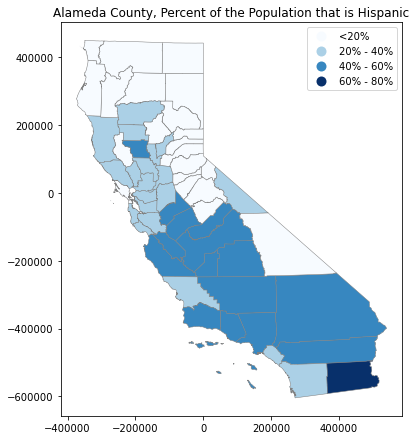

In [18]:
fig, ax = plt.subplots(figsize = (15,6)) 

# Plot percent non-white as choropleth
counties.plot(column=(counties['HISPANIC']/counties['POP2012'] * 100), 
                        legend=True, 
                        cmap="Blues", 
                        scheme='user_defined', 
                        classification_kwds={'bins':[20,40,60,80]},
                        edgecolor="grey",
                        linewidth=0.5,
                        ax=ax)

legend_labels_list = ['<20%','20% - 40%','40% - 60%','60% - 80%','80% - 100%']
for j in range(0,len(ax.get_legend().get_texts())):
        ax.get_legend().get_texts()[j].set_text(legend_labels_list[j])

plt.tight_layout()
plt.title("Alameda County, Percent of the Population that is Hispanic")
plt.show()

<div style="display:inline-block;vertical-align:top;">
    <img src="http://www.pngall.com/wp-content/uploads/2016/03/Light-Bulb-Free-PNG-Image.png" width="30" align=left > 
</div>  
<div style="display:inline-block;">

#### Questions
</div>

1. What new options have we added to our map code?
2. How many break values do we specify in the `classification_kwds` bins list and how many bins are in the map legend?

In [ ]:
# Your answer here

# 5.4 Point maps

Choropleth maps are great, but mapping using point symbols enables us to visualize our spatial data in another way. If you know both mapping methods you can expand how much information you can show in one map. 

> Point maps are a great way to map `counts` because the varying sizes of areas are deemphasized.



In [19]:
schools_df = pd.read_csv('notebook_data/alco_schools.csv')
schools_df.head()

,X,Y,Site,Address,City,State,Type,API,Org
0,-122.238761,37.744764,Amelia Earhart Elementary,400 Packet Landing Rd,Alameda,CA,ES,933,Public
1,-122.251856,37.738999,Bay Farm Elementary,200 Aughinbaugh Way,Alameda,CA,ES,932,Public
2,-122.258915,37.762058,Donald D. Lum Elementary,1801 Sandcreek Way,Alameda,CA,ES,853,Public
3,-122.234841,37.765250,Edison Elementary,2700 Buena Vista Ave,Alameda,CA,ES,927,Public
4,-122.238078,37.753964,Frank Otis Elementary,3010 Fillmore St,Alameda,CA,ES,894,Public


In [20]:
schools_gdf = gpd.GeoDataFrame(schools_df, 
                               geometry=gpd.points_from_xy(schools_df.X, schools_df.Y))
schools_gdf.crs = "epsg:4326"

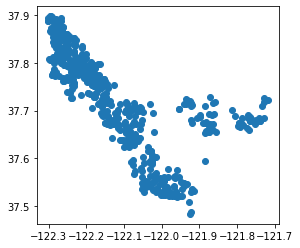

In [21]:
schools_gdf.plot()

### Proportional Color Maps
**Proportional color maps** linearly scale the `color` of a point symbol by the data values.

Let's try this by creating a map of total population (c_race).

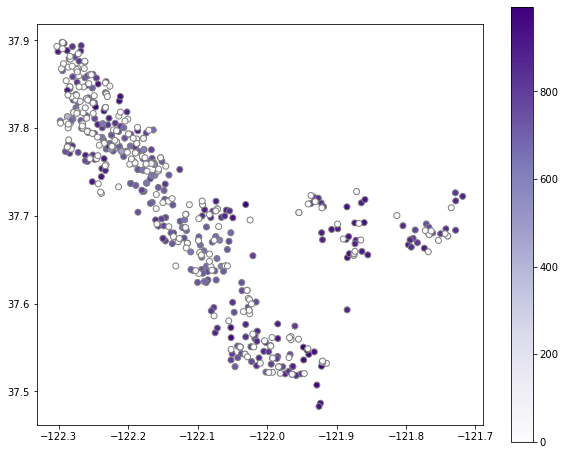

In [22]:
schools_gdf.plot(column="API", cmap="Purples", edgecolor="grey", figsize=(10,8), legend=True)
plt.show()

When you see that continuous color bar in the legend you know that the mapping of data values to colors is not classified.


### Graduated Color Maps

We can also create **graduated color maps** by binning data values before associating them with colors. These are just like choropleth maps but that term is used for polygon data. 

Graduated color maps use the same syntax as the choropleth maps above - you create them by setting a value for `scheme`. 

Below, we copy the code we used above to create a choropleth, but we change the name of the geodataframe to use the point gdf. 

In [33]:
schools_gdf['API'].describe()

count    550.000000
mean     462.320000
std      393.942535
min        0.000000
25%        0.000000
50%      670.500000
75%      807.750000
max      993.000000
Name: API, dtype: float64

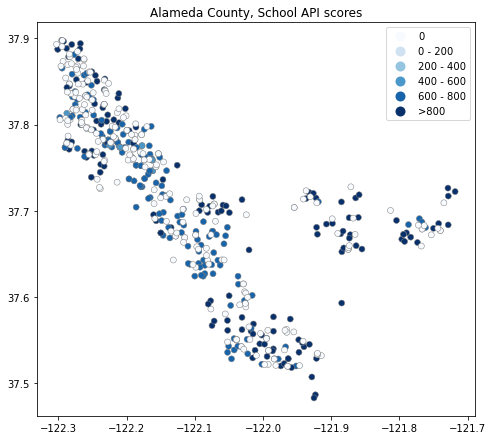

In [38]:
fig, ax = plt.subplots(figsize = (15,6)) 

# Plot percent non-white with graduated colors
schools_gdf.plot(column='API', 
                        legend=True, 
                        cmap="Blues",
                        scheme='user_defined', 
                        classification_kwds={'bins':[0,200,400,600,800]},
                        edgecolor="grey",
                        linewidth=0.5,
                        #markersize=50,
                        ax=ax)

# Create a custom legend
legend_labels_list = ['0','0 - 200','200 - 400','400 - 600','600 - 800','>800']

# Apply the legend to the map
for j in range(0,len(ax.get_legend().get_texts())):
        ax.get_legend().get_texts()[j].set_text(legend_labels_list[j])

# Create the plot
plt.tight_layout()
plt.title("Alameda County, School API scores")
plt.show()

The syntax for a choropleth and graduated color map is the same, although some options only apply to one or the other.

- Uncomment the `markersize` parameter above to see how you can further customize a graduated color map.

### Proportional Symbol Maps

Instead of changing the `color `of the points based on the data values, we can change their `size`.

Say we want to analyze how many renters there are in each tract using our variable `c_renters`. Using the option `markersize` we can set the size of each of our points to correlate with how many renters are in the tract.

### Graduated symbol maps

`Graduated symbol maps` are also a great method for mapping points.  These are just like graduated color maps but instead of associating symbol color with data values they associate point size. Similarly,graduated symbol maps use `classification schemes` to set the size of point symbols. 

> We demonstrate how to make graduated symbol maps along with some other mapping techniques in the `Optional Mapping notebook` which we encourage you to explore on your own.

<a id="section6"></a>
## 2.6 Mapping Categorical Data

Mapping categorical data, also called qualitative data, is a bit more straightforward. There is no need to scale or classify data values. The goal of the color map is to provide a contrasting set of colors so as to clearly delineate different categories. Let's check out a polygon and a point example.

First, load the census tract data for all of California and then set the colors as a funciton of the County FIPS code (`COUNTYFP`).

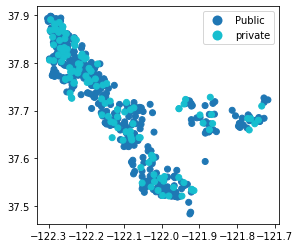

In [40]:
schools_gdf.plot(column='Org',  categorical=True, legend=True)

## 5.5 Exercise

1. Create a new choropleth map choosing a different variable. Customize appropriately and write down why you chose those customizations.
2. Create a new point map choosing a different variable. Customize appropriately and write down why you chose those customizations.

---
<div style="display:inline-block;vertical-align:middle;">
<a href="https://dlab.berkeley.edu/" target="_blank"><img src ="../assets/images/dlab_logo.png" width="75" align="left">
</a>
</div>

<div style="display:inline-block;vertical-align:middle;">
    <div style="font-size:larger">&nbsp;D-Lab @ University of California - Berkeley</div>
    <div>&nbsp;Team Geo<div>
</div>
        


